In [5]:
# Importing necessary library for Google Drive integration
from google.colab import drive

# Mounting Google Drive to access files
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# Defining the file path to access project resources in Google Drive
project_path = '/content/drive/MyDrive/Fake_Reviews_Detection' # Corrected path: Removed space in 'My Drive'

In [9]:
# Importing essential libraries for data manipulation, visualization, and analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuring Matplotlib for inline plotting in Jupyter notebooks
%matplotlib inline

# Suppressing warnings for a cleaner output
import warnings
warnings.filterwarnings('ignore')

# Importing libraries for text preprocessing and NLP tasks
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Importing libraries for feature extraction and model evaluation
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Downloading necessary NLTK datasets
nltk.download('wordnet')      # WordNet for lemmatization
nltk.download('stopwords')    # Stopwords for text cleaning
nltk.download('punkt')        # Punkt tokenizer for tokenization
nltk.download('omw-1.4')      # Open Multilingual WordNet (required for WordNet Lemmatizer in some cases)
nltk.download('punkt_tab')    # The 'punkt_tab' tokenizer model from NLTK for text tokenization


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [10]:
# Define the file path for the dataset
file_path = project_path + '/home_appliances_reviews.csv'

# Load the dataset into a Pandas DataFrame
# Adding error handling to provide more informative feedback
try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully!")  # Optional: Print a success message
except FileNotFoundError:
    print(f"Error: File not found at '{file_path}'. Please check the file path and ensure the file exists.")
except Exception as e:
    print(f"An error occurred: {e}")

# Display the first five rows of the dataset to understand its structure
df.head()

Dataset loaded successfully!


,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


In [11]:
# Checking for missing values in each column of the dataset
missing_values = df.isnull().sum()

# Displaying the count of missing values
print(missing_values)

category    0
rating      0
label       0
text_       0
dtype: int64


In [12]:
# Displaying a concise summary of the dataset, including column data types and non-null counts
dataset_info = df.info()
print(dataset_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40432 non-null  object 
 1   rating    40432 non-null  float64
 2   label     40432 non-null  object 
 3   text_     40432 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.2+ MB
None


In [13]:
# Generating summary statistics for numerical columns in the dataset
summary_stats = df.describe()

# Displaying the summary statistics
print(summary_stats)

             rating
count  40432.000000
mean       4.256579
std        1.144354
min        1.000000
25%        4.000000
50%        5.000000
75%        5.000000
max        5.000000


In [14]:
# Counting the occurrences of each unique value in the 'rating' column
rating_counts = df['rating'].value_counts()

# Displaying the count of each rating
print(rating_counts)

rating
5.0    24559
4.0     7965
3.0     3786
1.0     2155
2.0     1967
Name: count, dtype: int64


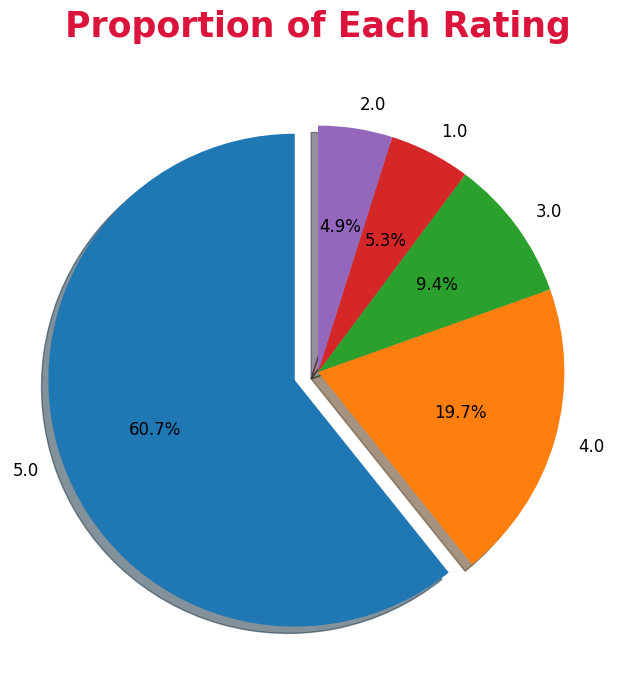

In [15]:
# Setting up the figure size for better visualization
plt.figure(figsize=(15, 8))

# Extracting the labels and values for the pie chart
labels = df['rating'].value_counts().keys()  # Unique rating values
values = df['rating'].value_counts().values  # Count of each rating

# Defining the explode parameter to highlight the first slice
explode = (0.1, 0, 0, 0, 0)  # Slightly separate the first slice

# Creating the pie chart
plt.pie(
    values,
    labels=labels,
    explode=explode,
    shadow=True,
    autopct='%1.1f%%',
    startangle=90,  # Ensures consistent orientation
    textprops={'fontsize': 12}  # Improves readability of labels
)

# Adding a title with custom styling
plt.title(
    'Proportion of Each Rating',
    fontweight='bold',
    fontsize=25,
    pad=20,
    color='crimson'
)

# Displaying the chart
plt.show()


In [16]:
# Function to clean text by removing punctuation and stopwords
def clean_text(text):
    # Remove punctuation from the text
    no_punctuation = ''.join([char for char in text if char not in string.punctuation])

    # Remove stopwords and return the cleaned text
    cleaned_text = ' '.join([
        word for word in no_punctuation.split()
        if word.lower() not in stopwords.words('english')
    ])

    return cleaned_text

In [17]:
# Display the original and cleaned text for the first entry in the 'text_' column
original_text = df['text_'][0]  # Access the first entry
cleaned_text = clean_text(original_text)  # Apply the cleaning function

# Print the results
print("Original Text:", original_text)
print("Cleaned Text:", cleaned_text)


Original Text: Love this!  Well made, sturdy, and very comfortable.  I love it!Very pretty
Cleaned Text: Love Well made sturdy comfortable love itVery pretty


In [18]:
# Apply the clean_text function to the first five rows of the 'text_' column
cleaned_texts = df['text_'].head().apply(clean_text)

# Display the cleaned text
print(cleaned_texts)

0    Love Well made sturdy comfortable love itVery ...
1    love great upgrade original Ive mine couple years
2              pillow saved back love look feel pillow
3          Missing information use great product price
4                 nice set Good quality set two months
Name: text_, dtype: object


In [19]:
# Display the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

Shape of the DataFrame: (40432, 4)


In [20]:
# Converting the 'text_' column to string type
df['text_'] = df['text_'].astype(str)

In [21]:
# Function to preprocess text: removes stopwords, digits, and punctuation
def preprocess(text):
    # Tokenize the text into words
    words = word_tokenize(text)

    # Filter out stopwords, digits, and punctuation
    processed_words = [
        word for word in words
        if word.lower() not in stopwords.words('english')  # Remove stopwords
        and not word.isdigit()  # Remove numeric values
        and word not in string.punctuation  # Remove punctuation
    ]

    # Join the filtered words back into a single string
    return ' '.join(processed_words)

In [22]:
# Preprocess the fifth text entry (index 4) from the 'text_' column
preprocessed_text = preprocess(df['text_'][4])

# Display the original and preprocessed text
print("Original Text:", df['text_'][4])
print("Preprocessed Text:", preprocessed_text)

Original Text: Very nice set. Good quality. We have had the set for two months now and have not been
Preprocessed Text: nice set Good quality set two months


In [23]:
# Apply the preprocess function to the first 10,000 entries in the 'text_' column
df.loc[:9999, 'text_'] = df.loc[:9999, 'text_'].apply(preprocess)

In [24]:
# Apply the preprocess function to rows 10000 to 20000 in the 'text_' column
df.loc[10000:20000, 'text_'] = df.loc[10000:20000, 'text_'].apply(preprocess)

In [25]:
# Apply the preprocess function to rows 20001 to 30000 in the 'text_' column
df.loc[20001:30000, 'text_'] = df.loc[20001:30000, 'text_'].apply(preprocess)

In [26]:
# Apply the preprocess function to rows 30001 to 40000 in the 'text_' column
df.loc[30001:40000, 'text_'] = df.loc[30001:40000, 'text_'].apply(preprocess)

In [27]:
# Apply the preprocess function to rows 40001 to 40432 in the 'text_' column
df.loc[40001:40432, 'text_'] = df.loc[40001:40432, 'text_'].apply(preprocess)

In [28]:
# Convert all text in 'text_' column to lowercase using a custom function
def convert_to_lowercase(text):
    return text.lower()

df['text_'] = df['text_'].apply(convert_to_lowercase)

In [29]:
from nltk.stem import PorterStemmer

# Initialize the stemmer
stemmer = PorterStemmer()

# Custom function to stem words in the text
def apply_stemming(text):
    words = text.split()  # Split the text into words
    stemmed_words = []
    for word in words:
        stemmed_word = stemmer.stem(word)  # Stem each word
        stemmed_words.append(stemmed_word)  # Collect the stemmed words
    return ' '.join(stemmed_words)  # Join the stemmed words back into a string

# Apply the custom stemming function to each row in the 'text_' column
df['text_'] = df['text_'].apply(apply_stemming)


In [30]:
from nltk.stem import WordNetLemmatizer

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Custom function to lemmatize words in the text
def lemmatize_text(text):
    words = text.split()  # Split the text into individual words
    lemmatized_words = []
    for word in words:
        lemmatized_word = lemmatizer.lemmatize(word)  # Lemmatize each word
        lemmatized_words.append(lemmatized_word)  # Append the lemmatized word to the list
    return ' '.join(lemmatized_words)  # Join the lemmatized words back into a single string

# Apply the custom lemmatization function to the 'text_' column
df["text_"] = df["text_"].apply(lemmatize_text)


In [31]:
# Display the first few rows (first 5) of the 'text_' column using the `iloc` method
print(df.iloc[:5]['text_'])

0       love well made sturdi comfort love pretti
1    love great upgrad origin 've mine coupl year
2          pillow save back love look feel pillow
3             miss inform use great product price
4             nice set good qualiti set two month
Name: text_, dtype: object


In [32]:
# Save the DataFrame to a CSV file with a custom file path
file_path = 'Preprocessed_Home_Appliances_Reviews.csv'
df.to_csv(file_path)
